# GML: plot graph and basic analysis
- reads gml file
    - article1.gml
- MultiDigraph to MultiGraph
    - directed = "graph"
    - undirected = "ugraph"

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from glob import glob

# read gml file
# ../data/graph/
graph = nx.read_gml('../data/graph/article1.gml')

## directed graph: graph

In [2]:
info = nx.info(graph)
print info

Name: 
Type: MultiDiGraph
Number of nodes: 140
Number of edges: 147
Average in degree:   1.0500
Average out degree:   1.0500


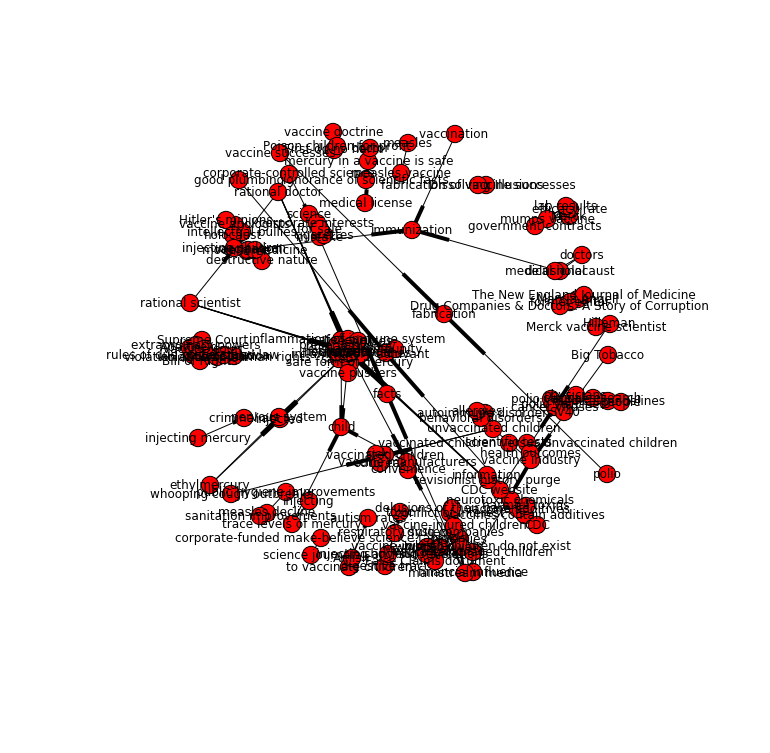

In [3]:
# plot spring layout
plt.figure(figsize=(10,10))
nx.draw_spring(graph, arrows=True, with_labels=True)

# plot circular layout
# plt.figure(figsize=(10,10))
# nx.draw_circular(graph, arrows=True, with_labels=True)

## undirected graph: ugraph

In [4]:
# for undirected graph
ugraph = graph.to_undirected()

info = nx.info(ugraph)
print info

Name: 
Type: MultiGraph
Number of nodes: 140
Number of edges: 145
Average degree:   2.0714


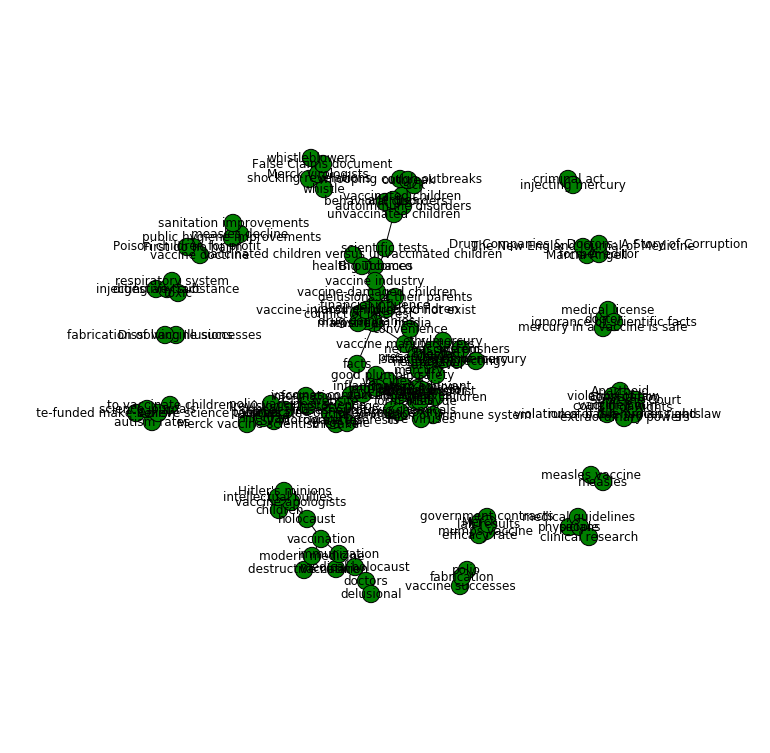

In [5]:
# plot spring layout
plt.figure(figsize=(10,10))
nx.draw_spring(ugraph, arrows=True, with_labels=True, node_color='g')

# plot circular layout
#plt.figure(figsize=(10,10))
#nx.draw_circular(ugraph, arrows=True, with_labels=True, node_color='g')

## Degree histogram
- Return a list of the frequency of each degree value
    - Degree values are the index in the list

In [6]:
# returns a list of frequencies of degrees
print ("undirected graph ="), nx.degree_histogram(ugraph)
print ("directed graph ="), nx.degree_histogram(graph)

undirected graph = [0, 79, 30, 8, 10, 7, 2, 1, 0, 1, 1, 0, 0, 0, 1]
directed graph = [0, 77, 32, 7, 11, 6, 3, 1, 0, 1, 1, 0, 0, 0, 1]


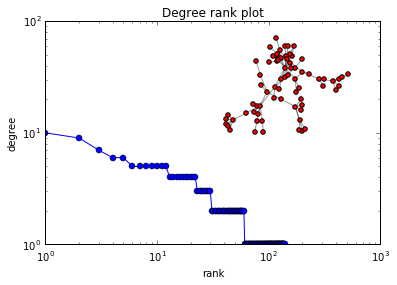

In [7]:
# only for undirected type

degree_sequence=sorted(nx.degree(ugraph).values(),reverse=True) # degree sequence
#print "Degree sequence", degree_sequence
dmax=max(degree_sequence)

plt.loglog(degree_sequence,'b-',marker='o')
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")

# draw graph in inset
plt.axes([0.45,0.45,0.45,0.45])
Gcc=sorted(nx.connected_component_subgraphs(ugraph), key = len, reverse=True)[0]
pos=nx.spring_layout(Gcc)
plt.axis('off')
nx.draw_networkx_nodes(Gcc,pos,node_size=20)
nx.draw_networkx_edges(Gcc,pos,alpha=0.4)

plt.show()

## Density
Notes: The density is 0 for a graph without edges and 1 for a complete graph. The density of multigraphs can be higher than 1. Self loops are counted in the total number of edges so graphs with self loops can have density higher than 1.

In [8]:
print "undirected graph =", nx.density(ugraph)
print "directed graph =", nx.density(graph)

undirected graph = 0.0149023638232
directed graph = 0.00755395683453


## Degree centrality
- Degree centrality for a node v is the fraction of nodes it is connected to

In [9]:
# get all the values of the dictionary, this returns a list of centrality scores
# turn the list into a numpy array
# take the mean of the numpy array

print "Degree centrality (directed) =", np.array(nx.degree_centrality(graph).values()).mean()
print "Degree centrality (undirected) =", np.array(nx.degree_centrality(ugraph).values()).mean()

Degree centrality (directed) = 0.0151079136691
Degree centrality (undirected) = 0.0149023638232


## Closeness centrality
- Closeness centrality of a node u is the reciprocal of the sum of the shortest path distances from u to all n-1 other nodes. Since the sum of distances depends on the number of nodes in the graph, closeness is normalized by the sum of minimum possible distances n-1
- Higher values of closeness indicate higher centrality

In [10]:
#clo_cen = np.array(nx.closeness_centrality(graph).values()).mean()

print "Closeness centrality (directed) =", np.array(nx.closeness_centrality(graph).values()).mean()
print "Closeness centrality (undirected) =", np.array(nx.closeness_centrality(ugraph).values()).mean()


Closeness centrality (directed) = 0.00977259197628
Closeness centrality (undirected) = 0.0614301831538


## Betweenness centrality
- Betweenness centrality of a node v is the sum of the fraction of all pairs shortest paths that pass through v
    - Compute the shortest-path betweenness centrality for nodes

In [11]:
#nx.betweenness_centrality(graph)
#bet_cen = np.array(nx.betweenness_centrality(graph).values()).mean()

print "Betweenness centrality (directed) =", np.array(nx.betweenness_centrality(graph).values()).mean()
print "Betweenness centrality (undirected) =", np.array(nx.betweenness_centrality(ugraph).values()).mean()

Betweenness centrality (directed) = 8.37839045534e-05
Betweenness centrality (undirected) = 0.00791441381057


### Current-flow betweenness centrality
- Current-flow betweenness centrality uses an electrical current model for information spreading in contrast to betweenness centrality which uses shortest paths.
- Current-flow betweenness centrality is also known as random-walk betweenness centrality

In [12]:
# graph must be connected
#print nx.current_flow_betweenness_centrality(graph)

## Degree assortativity coefficient

In [13]:
#deg_ac = nx.degree_assortativity_coefficient(graph)
print "Degree assortativity coefficient (directed) =", nx.degree_assortativity_coefficient(graph)
print "Degree assortativity coefficient (undirected) =", nx.degree_assortativity_coefficient(ugraph)

Degree assortativity coefficient (directed) = -0.015874402812
Degree assortativity coefficient (undirected) = -0.166327244531


## Degree pearson correlation coefficient
Assortativity measures the similarity of connections in the graph with respect to the node negree
- Returns r -- Assortativity of graph by degree

In [14]:
#deg_pcc = nx.degree_pearson_correlation_coefficient(graph)
print "Degree pearson correlation coefficient (directed) =", nx.degree_pearson_correlation_coefficient(graph)
print "Degree pearson correlation coefficient (undirected) =", nx.degree_pearson_correlation_coefficient(ugraph)

Degree pearson correlation coefficient (directed) = -0.015874402812
Degree pearson correlation coefficient (undirected) = -0.166327244531


## Clustering coefficient

In [15]:
# (cannot be multigraph)
#nx.average_clustering(ugraph)

## Condensation
#nx.condensation(graph)

## Average node connectivity
The average connectivity \bar{\kappa} of a graph G is the average of local node connectivity over all pairs of nodes of G

In [16]:
#nx.edge_connectivity(graph)
#nx.node_connectivity(graph)

#avg_node_con = nx.average_node_connectivity(graph)
print "Average node connectivity (directed) =", nx.average_node_connectivity(graph)
print "Average node connectivity (undirected) =", nx.average_node_connectivity(ugraph)

Average node connectivity (directed) = 0.0160328879753
Average node connectivity (undirected) = 0.289311408016


## Closeness vitality
Compute closeness vitality for nodes. Closeness vitality of a node is the change in the sum of distances between all node pairs when excluding that node.

{0: 4.0, 1: 4.0, 2: 4.0}

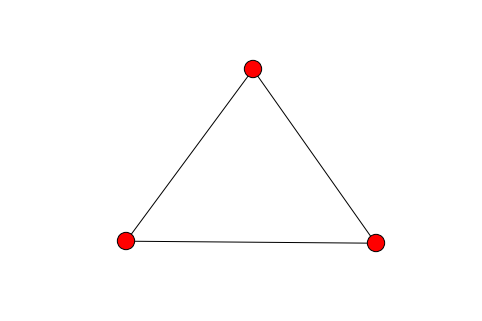

In [17]:
# example
G = nx.cycle_graph(3)
nx.draw(G)
nx.closeness_vitality(G)

In [18]:
#nx.closeness_vitality(graph)

In [19]:
# intersection_all()
# return a new graph that contains only the edges that exist in all graphs
# all supplied graphs must have the same node set

# Summary

In [20]:
print info
print "Density ="
print "Degree centrality ="
print "Closeness centrality ="
print "Betweenness centrality ="
print "Degree assortativity coefficient ="
print "Degree pearson correlation coefficient ="
print "Average node connectivity ="
#print "Closeness vitality ="

Name: 
Type: MultiGraph
Number of nodes: 140
Number of edges: 145
Average degree:   2.0714
Density =
Degree centrality =
Closeness centrality =
Betweenness centrality =
Degree assortativity coefficient =
Degree pearson correlation coefficient =
Average node connectivity =
